In [3]:
import numpy as np
from tensorflow.keras.models import Sequential # 모델 객체 생성
from tensorflow.keras.layers import Dense, Input # 모델 layer 쌓을 때 필요한 함수
import matplotlib.pyplot as plt

In [5]:
y_data.shape

(4, 1)

In [4]:
# 1. dataset
x_data = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
y_data = np.array([[0],
                  [1],
                  [1],
                  [0]])

# 2. 모델 구성
model = Sequential()
# model.add(Input(shape=2))
model.add(Dense(units=10,
               input_dim=2, # input_shape=(2,)
               activation='relu'))
model.add(Dense(units=20, activation='relu')) #은닉층(hidden layer)에서는 input_shape를 X
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
print(model.summary())

# 3. 모델 학습과정 설정
# model.compile(loss='mse', optimizer='adam', metrics=['mae]']) 회귀식에서 학습과정 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 다중분류

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# 4. 학습
hist = model.fit(x_data, y_data, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6799 - binary_accuracy: 0.5000 - 643ms/epoch - 643ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6786 - binary_accuracy: 0.2500 - 4ms/epoch - 4ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6773 - binary_accuracy: 0.2500 - 4ms/epoch - 4ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6761 - binary_accuracy: 0.5000 - 4ms/epoch - 4ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6750 - binary_accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6739 - binary_accuracy: 0.5000 - 3ms/epoch - 3ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6730 - binary_accuracy: 0.7500 - 3ms/epoch - 3ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6719 - binary_accuracy: 0.7500 - 4ms/epoch - 4ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6710 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6700 - binary_accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6690 - binary_accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6680 - binary_accuracy: 1.0

Epoch 97/100
1/1 - 0s - loss: 0.5331 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 98/100
1/1 - 0s - loss: 0.5307 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 99/100
1/1 - 0s - loss: 0.5284 - binary_accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 100/100
1/1 - 0s - loss: 0.5260 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step


In [15]:
# 5. 학습과정 보기 및 평가
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

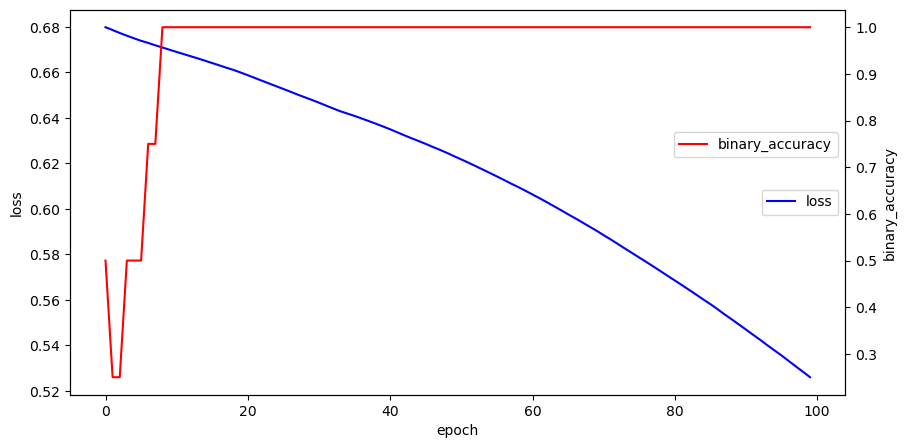

In [26]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'b', label='loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax
acc_ax.plot(hist.history['binary_accuracy'],'r', label='binary_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('binary_accuracy')

loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999,0.7))
plt.show()

In [28]:
# 모델 평가하기
score = model.evaluate(x_data, y_data)
print('loss :',score[0])
print('accuracy :',score[1])

1/1 [==============================] - 0s 37ms/step - loss: 0.5235 - binary_accuracy: 1.0000
loss : 0.5235183835029602
accuracy : 1.0


In [32]:
# 예측
int(model.predict(np.array([[0,1]])).round())

1/1 [==============================] - 0s 27ms/step


1

In [35]:
# 리스트에 0과 1만 들어 있는지 여부
temp = [0,1,2]
print(all([x in (0,1) for x in temp]))
print(all(x in (0,1) for x in temp))

False
False


In [43]:
# 독립변수 2개(0 0, 0 1, 1 0, 1 1)를 입력받아 예측값을 출력(종료는 수를 1개만 입력할 때)
while True:
    input_nums = input('space로 분리해서 0또는 1을 2개 입력(한개만 입력하면 종료됩니다)')
    #'0 1' => '0 1' => '0','1'
    input_list = input_nums.strip().split()
    input_nums = list(map(int, input_list)) # [0, 1]
    if len(input_nums)==1:
        print('데이터를 하나만 입력할 경우 종료됩니다. bye~')
        break
    if all(x in [0,1] for x in input_nums): # 0과 1만 입력한 경우
        input_data = np.array(input_nums[:2]).reshape(-1, 2)
        print('입력값 :', input_nums[0], input_nums[1])
        print('예측값 :', int(model.predict(input_data).round()))
    else:
        print('0과 1만 입력하셔야 예측값을 볼 수 있습니다')

space로 분리해서 0또는 1을 2개 입력(한개만 입력하면 종료됩니다)0 1
입력값 : 0 1
1/1 [==============================] - 0s 27ms/step
예측값 : 1
space로 분리해서 0또는 1을 2개 입력(한개만 입력하면 종료됩니다)1 2
0과 1만 입력하셔야 예측값을 볼 수 있습니다
space로 분리해서 0또는 1을 2개 입력(한개만 입력하면 종료됩니다)1 1
입력값 : 1 1
1/1 [==============================] - 0s 26ms/step
예측값 : 0
space로 분리해서 0또는 1을 2개 입력(한개만 입력하면 종료됩니다)0 0
입력값 : 0 0
1/1 [==============================] - 0s 26ms/step
예측값 : 0
space로 분리해서 0또는 1을 2개 입력(한개만 입력하면 종료됩니다)1
데이터를 하나만 입력할 경우 종료됩니다. bye~


# 2. AND

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                30        
                                                                 
 dense_25 (Dense)            (None, 20)                220       
                                                                 
 dense_26 (Dense)            (None, 10)                210       
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/1 - 1s - loss: 0.7297 - binary_accuracy: 0.5000 - 609ms/epoch - 609ms/step
Epoch 2/100
1/1 - 0s - loss: 0.7273 - binary_accuracy: 0.5000 - 4ms/epoch - 4ms/step
Epoch 3/1

Epoch 86/100
1/1 - 0s - loss: 0.5400 - binary_accuracy: 0.7500 - 4ms/epoch - 4ms/step
Epoch 87/100
1/1 - 0s - loss: 0.5368 - binary_accuracy: 0.7500 - 2ms/epoch - 2ms/step
Epoch 88/100
1/1 - 0s - loss: 0.5336 - binary_accuracy: 0.7500 - 3ms/epoch - 3ms/step
Epoch 89/100
1/1 - 0s - loss: 0.5302 - binary_accuracy: 0.7500 - 15ms/epoch - 15ms/step
Epoch 90/100
1/1 - 0s - loss: 0.5269 - binary_accuracy: 0.7500 - 7ms/epoch - 7ms/step
Epoch 91/100
1/1 - 0s - loss: 0.5234 - binary_accuracy: 0.7500 - 4ms/epoch - 4ms/step
Epoch 92/100
1/1 - 0s - loss: 0.5199 - binary_accuracy: 0.7500 - 3ms/epoch - 3ms/step
Epoch 93/100
1/1 - 0s - loss: 0.5163 - binary_accuracy: 0.7500 - 4ms/epoch - 4ms/step
Epoch 94/100
1/1 - 0s - loss: 0.5127 - binary_accuracy: 0.7500 - 5ms/epoch - 5ms/step
Epoch 95/100
1/1 - 0s - loss: 0.5091 - binary_accuracy: 0.7500 - 4ms/epoch - 4ms/step
Epoch 96/100
1/1 - 0s - loss: 0.5053 - binary_accuracy: 0.7500 - 3ms/epoch - 3ms/step
Epoch 97/100
1/1 - 0s - loss: 0.5016 - binary_accura

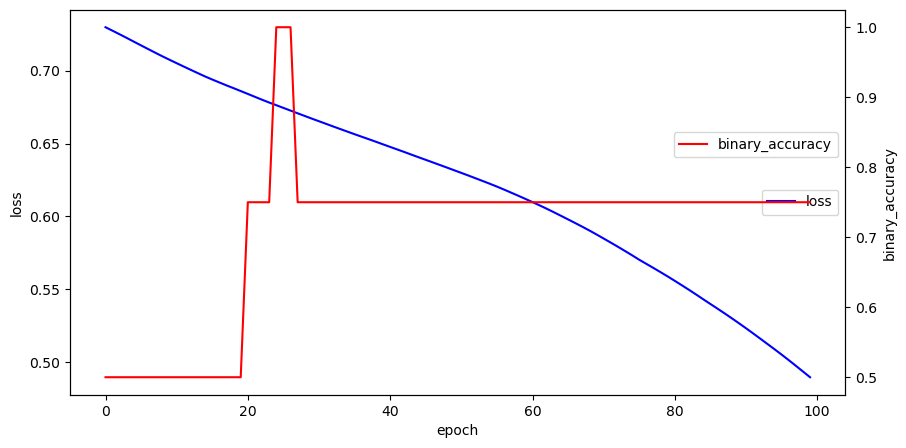

1/1 [==============================] - 0s 162ms/step - loss: 0.4859 - binary_accuracy: 0.7500
loss : 0.48587363958358765
accuracy : 0.75
1/1 [==============================] - 0s 75ms/step


0

In [45]:



# 2. 모델 구성
model = Sequential()
# model.add(Input(shape=2))
model.add(Dense(units=10,
               input_dim=2, # input_shape=(2,)
               activation='relu'))
model.add(Dense(units=20, activation='relu')) #은닉층(hidden layer)에서는 input_shape를 X
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
print(model.summary())

# 3. 모델 학습과정 설정
# model.compile(loss='mse', optimizer='adam', metrics=['mae]']) 회귀식에서 학습과정 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 다중분류

# 4. 학습
hist = model.fit(x_data, y_data, epochs=100, verbose=2)

# 5. 학습과정 살펴보기 및 평가
hist.history.keys()

fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'b', label='loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax
acc_ax.plot(hist.history['binary_accuracy'],'r', label='binary_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('binary_accuracy')

loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999,0.7))
plt.show()

# 모델 평가하기
score = model.evaluate(x_data, y_data)
print('loss :',score[0])
print('accuracy :',score[1])

# 6. 예측하기 : np.array([[0,1]])를 예측하기
int(model.predict(np.array([[0,1]]))>=0.5)